# **K - Means - Elbow**

# Connect to your driver

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/GG Colab

/content/drive/MyDrive/GG Colab


# Source

In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.datasets import make_blobs

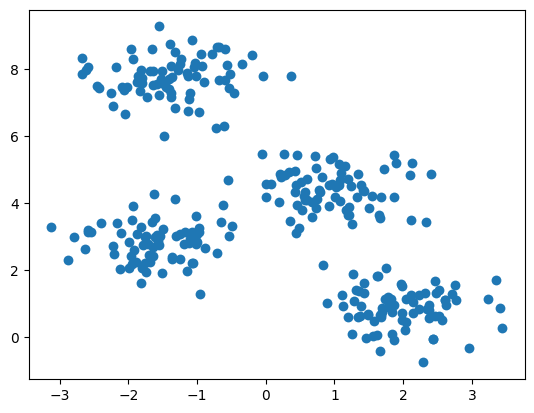

In [5]:
x, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(x[:,0], x[:,1], s=50, linewidth=0)

In [20]:
x.astype('int')

array([[ 0,  2],
       [-1,  7],
       [ 1,  5],
       [-1,  7],
       [ 1,  1],
       [ 3,  0],
       [-1,  1],
       [ 1,  4],
       [ 0,  8],
       [ 0,  8],
       [-1,  2],
       [-2,  8],
       [ 1,  4],
       [-2,  6],
       [ 1,  0],
       [ 0,  3],
       [ 1,  4],
       [ 2,  0],
       [-1,  3],
       [-1,  2],
       [ 2,  1],
       [ 1,  1],
       [ 0,  5],
       [-1,  2],
       [-1,  2],
       [ 0,  4],
       [ 1,  0],
       [ 0,  4],
       [-2,  2],
       [ 0,  4],
       [ 0,  7],
       [-2,  7],
       [ 1,  4],
       [-1,  6],
       [-1,  7],
       [-2,  7],
       [-2,  7],
       [-2,  7],
       [-2,  2],
       [ 1,  0],
       [ 0,  3],
       [-1,  2],
       [ 0,  5],
       [ 1,  4],
       [-1,  2],
       [-1,  2],
       [-1,  8],
       [-1,  2],
       [-1,  7],
       [ 1,  1],
       [-1,  3],
       [ 2,  0],
       [ 0,  7],
       [ 1,  0],
       [ 1,  2],
       [-1,  2],
       [ 0,  7],
       [-1,  1],
       [-1,  7

In [21]:
y.astype('int')

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

In [6]:
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(x)
  wcss.append(kmeans.inertia_)
wcss

[2812.137595303235,
 1190.7823593643448,
 546.8911504626302,
 212.00599621083475,
 188.77323556773717,
 170.72930303134984,
 154.88627870386387,
 137.528281970834,
 123.76405206101045,
 112.40802361314263]

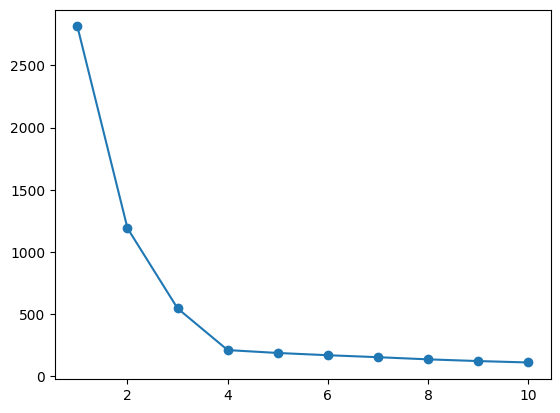

In [7]:
plt.plot(range(1, 11), wcss, marker='o')
plt.show()

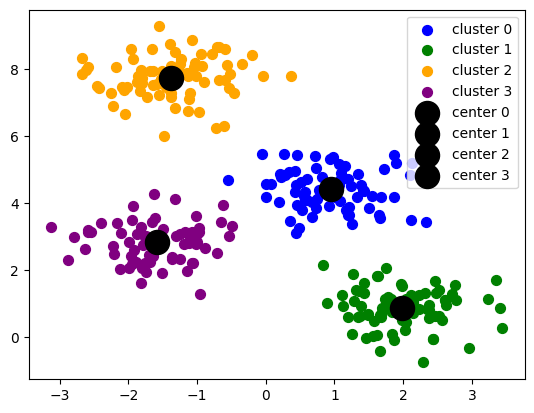

In [23]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
preY = kmeans.fit_predict(x)
colors = ['blue', 'green', 'orange', 'purple']
for i in range(4):
  plt.scatter(x[preY == i, 0], x[preY == i, 1], s=50, c=colors[i], label='cluster ' + str(i))

colors2 = ['blue', 'green', 'orange', 'purple']
for i in range(4):
  plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], s=300, c='black', label='center ' + str(i))
  plt.legend()
plt.show()